In [1]:
import roboticstoolbox as rtb
robot = rtb.models.Panda()
print(robot)

ERobot: panda (by Franka Emika), 7 joints (RRRRRRR), 1 gripper, geometry, collision
┌──────┬──────────────┬───────┬─────────────┬────────────────────────────────────────────────┐
│ link │     link     │ joint │   parent    │              ETS: parent to link               │
├──────┼──────────────┼───────┼─────────────┼────────────────────────────────────────────────┤
│    0 │ panda_link0  │       │ BASE        │ SE3()                                          │
│    1 │ panda_link1  │     0 │ panda_link0 │ SE3(0, 0, 0.333) ⊕ Rz(q0)                      │
│    2 │ panda_link2  │     1 │ panda_link1 │ SE3(-90°, -0°, 0°) ⊕ Rz(q1)                    │
│    3 │ panda_link3  │     2 │ panda_link2 │ SE3(0, -0.316, 0; 90°, -0°, 0°) ⊕ Rz(q2)       │
│    4 │ panda_link4  │     3 │ panda_link3 │ SE3(0.0825, 0, 0; 90°, -0°, 0°) ⊕ Rz(q3)       │
│    5 │ panda_link5  │     4 │ panda_link4 │ SE3(-0.0825, 0.384, 0; -90°, -0°, 0°) ⊕ Rz(q4) │
│    6 │ panda_link6  │     5 │ panda_link5 │ SE3(90°, -0°, 0

In [10]:
from spatialmath import SE3

Tep = SE3.Trans(0.6, -0.3, 0.1) * SE3.OA([0, 1, 0], [0, 0, -1])
sol = robot.ik_LM(Tep)         # solve IK
print(sol)

(array([ 2.14564142, -0.77785236, -2.52626769, -1.69723488, -0.56816772,
        2.28937294, -2.48777689]), 1, 8, 1, 6.71140879720436e-10)


In [11]:
q_pickup = sol[0]
print(robot.fkine(q_pickup))    # FK shows that desired end-effector pose was achieved


  -1         4.483e-06  1.69e-05  0.6       
   4.483e-06  1         2.153e-05 -0.3       
  -1.69e-05  2.153e-05 -1         0.1       
   0         0         0         1         



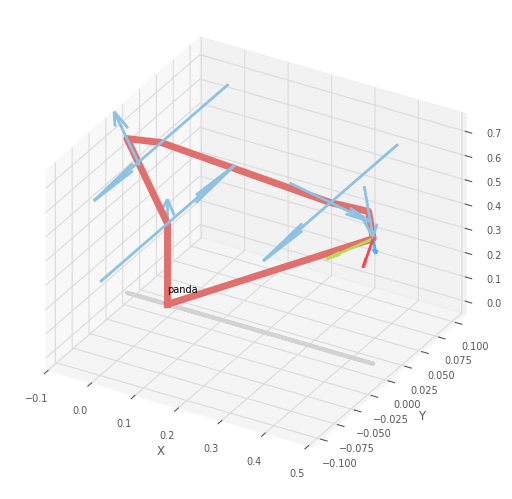

AttributeError: 'Axes3D' object has no attribute 'w_xaxis'

<Figure size 640x480 with 0 Axes>

In [12]:
qt = rtb.jtraj(robot.qr, q_pickup, 50)
robot.plot(qt.q, backend='pyplot', movie='panda1.gif')

In [7]:
robot.plot(qt.q)

Swift backend, t = 2.499999999999999, scene:
  panda

In [8]:
import swift
import roboticstoolbox as rtb
import spatialmath as sm
import numpy as np

env = swift.Swift()
env.launch(realtime=True)

panda = rtb.models.Panda()
panda.q = panda.qr

Tep = panda.fkine(panda.q) * sm.SE3.Trans(0.2, 0.2, 0.45)

arrived = False
env.add(panda)

dt = 0.05

while not arrived:

    v, arrived = rtb.p_servo(panda.fkine(panda.q), Tep, 1)
    panda.qd = np.linalg.pinv(panda.jacobe(panda.q)) @ v
    env.step(dt)

# Uncomment to stop the browser tab from closing
# env.hold()